In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3= pd.read_excel("Natal.xlsx")
df4= pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [55]:
df = pd.concat([df1,df2,df3,df4,df5])
print (df)

       Cidade       Data  Vendas  LojaID  Qtde
0     Aracaju 2018-01-01  142.00    1520     1
1     Aracaju 2018-01-01   14.21    1522     6
2     Aracaju 2018-01-01   71.55    1520     1
3     Aracaju 2018-01-01    3.01    1521     7
4     Aracaju 2018-01-01   24.51    1522     8
..        ...        ...     ...     ...   ...
235  Salvador 2019-01-03   41.84    1034     1
236  Salvador 2019-01-03  126.29    1035     3
237  Salvador 2019-01-03   38.06    1036     3
238  Salvador 2019-01-03  139.64    1035     1
239  Salvador 2019-01-03  161.41    1037     3

[894 rows x 5 columns]


In [56]:
df["LojaID"]=df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [57]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [58]:
df=df.rename(columns={"Qtde":"Quantidade_vendida"})
print(df)

       Cidade       Data  Vendas LojaID  Quantidade_vendida
0     Aracaju 2018-01-01  142.00   1520                   1
1     Aracaju 2018-01-01   14.21   1522                   6
2     Aracaju 2018-01-01   71.55   1520                   1
3     Aracaju 2018-01-01    3.01   1521                   7
4     Aracaju 2018-01-01   24.51   1522                   8
..        ...        ...     ...    ...                 ...
235  Salvador 2019-01-03   41.84   1034                   1
236  Salvador 2019-01-03  126.29   1035                   3
237  Salvador 2019-01-03   38.06   1036                   3
238  Salvador 2019-01-03  139.64   1035                   1
239  Salvador 2019-01-03  161.41   1037                   3

[894 rows x 5 columns]


In [59]:
df["Receita"] = df["Vendas"]*df["Quantidade_vendida"]
print (df)

       Cidade       Data  Vendas LojaID  Quantidade_vendida  Receita
0     Aracaju 2018-01-01  142.00   1520                   1   142.00
1     Aracaju 2018-01-01   14.21   1522                   6    85.26
2     Aracaju 2018-01-01   71.55   1520                   1    71.55
3     Aracaju 2018-01-01    3.01   1521                   7    21.07
4     Aracaju 2018-01-01   24.51   1522                   8   196.08
..        ...        ...     ...    ...                 ...      ...
235  Salvador 2019-01-03   41.84   1034                   1    41.84
236  Salvador 2019-01-03  126.29   1035                   3   378.87
237  Salvador 2019-01-03   38.06   1036                   3   114.18
238  Salvador 2019-01-03  139.64   1035                   1   139.64
239  Salvador 2019-01-03  161.41   1037                   3   484.23

[894 rows x 6 columns]


In [60]:
df.groupby("Cidade")["Receita"].sum()
df.sort_values("Receita",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Quantidade_vendida,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [61]:
df["Dia"]=df["Data"].dt.day
df["Mes"]=df["Data"].dt.month
df["Ano"]=df["Data"].dt.year
df["Trimestre"]=df["Data"].dt.quarter
df.sample(10)

,Cidade,Data,Vendas,LojaID,Quantidade_vendida,Receita,Dia,Mes,Ano,Trimestre
44,Natal,2019-01-03,500.00,852,4,2000.00,3,1,2019,1
121,Recife,2019-03-02,41.55,981,3,124.65,2,3,2019,1
211,Natal,2019-01-02,141.05,1035,3,423.15,2,1,2019,1
123,Aracaju,2018-01-01,115.19,1523,6,691.14,1,1,2018,1
181,Natal,2019-01-02,244.83,1037,2,489.66,2,1,2019,1
6,Aracaju,2018-01-01,35.50,1522,2,71.00,1,1,2018,1
67,Natal,2019-02-14,379.00,852,2,758.00,14,2,2019,1
0,Salvador,2018-01-01,31.06,1037,3,93.18,1,1,2018,1
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,1,1,2019,1
12,Recife,2019-01-01,17.48,982,2,34.96,1,1,2019,1


In [62]:
# Filtrando somente pelas vendas de 2018 com receita superior a 1000

vendas_2018_receita_1000=df.loc[(df["Ano"]==2018) & (df["Receita"]>1000)]

In [63]:
vendas_2018_receita_1000

,Cidade,Data,Vendas,LojaID,Quantidade_vendida,Receita,Dia,Mes,Ano,Trimestre
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,1,1,2018,1
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,1,1,2018,1
31,Aracaju,2018-01-01,171.16,1520,9,1540.44,1,1,2018,1
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,1,1,2018,1
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,1,1,2018,1
71,Aracaju,2018-01-01,228.27,1523,6,1369.62,1,1,2018,1
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,1,1,2018,1
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,1,1,2018,1
78,Aracaju,2018-01-01,154.85,1522,9,1393.65,1,1,2018,1
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,1,1,2018,1


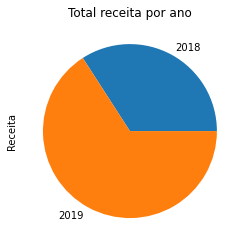

In [64]:
df["LojaID"].value_counts(ascending=False)

df.groupby("Ano")["Receita"].sum().plot.pie(title="Total receita por ano");


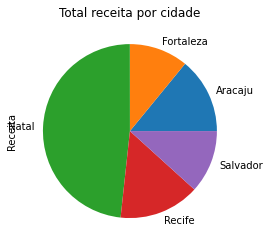

In [68]:
df.groupby("Cidade")["Receita"].sum().plot.pie(title="Total receita por cidade");

